# Creating financial ratios dataframe from Capital IQ Excel file

In [60]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#!pip install --upgrade xlrd

In [3]:
#Upload the excel Sheet
file = '100Companies_ratios.xlsx'

In [4]:
# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet count
len(xl.sheet_names)

97

Reports generated by Capital IQ can have missing data. The following steps are needed for further inspections.

In [56]:
#loop over each sheet to create a list of each sheet's count of rows and columns
rows = []
columns = []
for i in range(len(xl.sheet_names)):
    rows.append(xl.parse(i).shape[0])
    columns.append(xl.parse(i).shape[1])

In [57]:
#convert the lists iiinto a dataframe for inspection
dfrc = pd.DataFrame()
dfrc['rows'] = rows
dfrc['columns'] = columns
dfrc.head()

,rows,columns
0,132,7
1,132,7
2,132,7
3,132,7
4,132,7


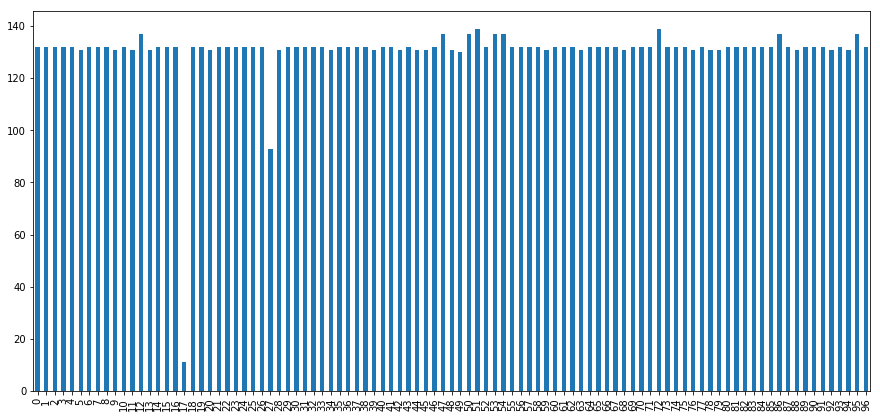

In [100]:
#visualize the number rows, same can be done for columns
dfrc['rows'].plot(kind='bar', figsize=(15, 7))
plt.show()

There most common is 7 columns (years) and around 130 rows (financial ratios). this is important for extracting the data through a function without hitting an error

In [72]:
def clean_df(df):
    '''A function that takes one sheet as a dataframe, extracts company name and ticker, and removes the top few rows'''
    
    
    df = df
    if '(' in df['Unnamed: 0'].iloc[0]:
        company_name = df['Unnamed: 0'].iloc[0][:df['Unnamed: 0'].iloc[0].index('(')- 1]
        company_ticker = df['Unnamed: 0'].iloc[0][df['Unnamed: 0'].iloc[0].index('(')+1 : df['Unnamed: 0'].iloc[0].index(')')]
    else:
        company_name = df['Unnamed: 0'].iloc[0][:df['Unnamed: 0'].iloc[0].index('>')- 1]
        company_ticker = None
    dfx = df.drop(df.index[0:3]).copy()
    dfx.columns = ['ratios', 2014, 2015, 2016, 2017, 2018, 2019]
    dfx=dfx.iloc[1:]
    dfx['company_name'] = company_name
    dfx['company_ticker'] = company_ticker
    
    return dfx

In [73]:
# loop over each sheet in the file and add the clean dataframe to a list
frames = []
for i in range(len(xl.sheet_names)):
    if xl.parse(i).shape[1] == 7:
        frames.append(clean_df(xl.parse(i)))

In [74]:
#concatinate all 500 dataframes into 1
ratios100 = pd.concat(frames)

In [75]:
ratios100.shape

(12147, 9)

In [78]:
ratios100.columns

Index(['ratios', 2014, 2015, 2016, 2017, 2018, 2019, 'company_name',
       'company_ticker'],
      dtype='object')

In [97]:
ratios100.T

,4,5,6,7,8,9,10,11,12,13,...,122,123,124,125,126,127,128,129,130,131
ratios,Profitability,Return on Assets %,Return on Capital %,Return on Equity %,Return on Common Equity %,Margin Analysis,Gross Margin %,SG&A Margin %,EBITDA Margin %,EBITA Margin %,...,Inventory,Net PP&E,Total Assets,Tangible Book Value,Common Equity,Cash from Ops.,Capital Expenditures,Levered Free Cash Flow,Unlevered Free Cash Flow,Dividend per Share
2014,NaN,13.8%,20.3%,32.2%,32.4%,NaN,48.3%,20.3%,26.8%,23.1%,...,22.5%,4.6%,8.4%,NM,32.4%,9.6%,13.5%,NM,NM,11.7%
2015,NaN,13.7%,20.7%,39.3%,39.4%,NaN,49.3%,20.4%,27.9%,23.9%,...,14.2%,6.2%,6.6%,NM,18.0%,26.0%,16.8%,NM,108.5%,16.7%
2016,NaN,13.5%,20.0%,46.4%,46.5%,NaN,49.8%,20.3%,28.5%,24.5%,...,6.0%,6.6%,2.4%,NM,(25.3%),21.1%,8.8%,NM,NM,21.0%
2017,NaN,12.9%,19.2%,44.3%,44.4%,NaN,49.6%,20.5%,27.4%,23.9%,...,10.2%,5.6%,4.8%,NM,(22.4%),12.2%,0.4%,28.5%,26.3%,26.4%
2018,NaN,11.5%,17.1%,50.0%,50.1%,NaN,49.2%,22.7%,25.5%,21.7%,...,7.8%,4.3%,4.8%,NM,(53.1%),13.4%,(3.9%),12.7%,12.3%,28.7%
2019,NaN,10.1%,14.2%,47.1%,47.2%,NaN,48.0%,22.3%,24.8%,20.9%,...,9.3%,4.9%,7.4%,NM,NM,(12.3%),(3.1%),NM,(30.3%),24.1%
company_name,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,...,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company
company_ticker,NYSE:MMM,NYSE:MMM,NYSE:MMM,NYSE:MMM,NYSE:MMM,NYSE:MMM,NYSE:MMM,NYSE:MMM,NYSE:MMM,NYSE:MMM,...,NYSE:BA,NYSE:BA,NYSE:BA,NYSE:BA,NYSE:BA,NYSE:BA,NYSE:BA,NYSE:BA,NYSE:BA,NYSE:BA


In [99]:
# use melt to make results usable
melted = pd.melt(ratios100, id_vars=['ratios', 'company_name', 'company_ticker'])
melted.sort_values(by=['company_name', 'variable'], inplace=True)
melted.head()

,ratios,company_name,company_ticker,variable,value
0,Profitability,3M Company,NYSE:MMM,2014,NaN
1,Return on Assets %,3M Company,NYSE:MMM,2014,13.8%
2,Return on Capital %,3M Company,NYSE:MMM,2014,20.3%
3,Return on Equity %,3M Company,NYSE:MMM,2014,32.2%
4,Return on Common Equity %,3M Company,NYSE:MMM,2014,32.4%


In [106]:
#save to a csv file as backup
melted.to_csv('sample_ratios.csv')

Now there are more than 100 ratio in the dataframe which are not all critical. Therefore, next i have filtered only for needed ratios. In my case: return on capital %, return on equity%, net profit margin %, and EBITA%

In [102]:
melted['ratios'].iloc[2]

'    Return on Capital %'

In [104]:
melted.loc[melted['ratios'] == '    Return on Capital %']

,ratios,company_name,company_ticker,variable,value
2,Return on Capital %,3M Company,NYSE:MMM,2014,20.3%
12149,Return on Capital %,3M Company,NYSE:MMM,2015,20.7%
24296,Return on Capital %,3M Company,NYSE:MMM,2016,20.0%
36443,Return on Capital %,3M Company,NYSE:MMM,2017,19.2%
48590,Return on Capital %,3M Company,NYSE:MMM,2018,17.1%
...,...,...,...,...,...
13172,Return on Capital %,adidas AG,XTRA:ADS,2015,9.3%
25319,Return on Capital %,adidas AG,XTRA:ADS,2016,12.0%
37466,Return on Capital %,adidas AG,XTRA:ADS,2017,17.0%
49613,Return on Capital %,adidas AG,XTRA:ADS,2018,19.2%


In [108]:
# Load spreadsheet: xl for 100-299
file2 = 'Companies_ratios_2&3.xlsx'

xl2 = pd.ExcelFile(file2)

# Print sheet names
len(xl2.sheet_names)

190

In [111]:
# Load spreadsheet: xl for 300 - 500
file3 = 'Companies_ratios4&5.xlsx'

xl3 = pd.ExcelFile(file3)

# Print sheet names
len(xl3.sheet_names)

194

In [113]:
# more data
frames2 = []
for i in range(len(xl2.sheet_names)):
    if xl2.parse(i).shape[1] == 7:
        frames2.append(clean_df(xl2.parse(i)))

In [114]:
# and more data
frames3 = []
for i in range(len(xl3.sheet_names)):
    if xl3.parse(i).shape[1] == 7:
        frames3.append(clean_df(xl3.parse(i)))

In [115]:
# concatinate them
ratios_200 = pd.concat(frames2)
ratios_300 = pd.concat(frames3)

In [116]:
# melt
melted2 = pd.melt(ratios_200, id_vars=['ratios', 'company_name', 'company_ticker'])
melted2.sort_values(by=['company_name', 'variable'], inplace=True)

melted3 = pd.melt(ratios_300, id_vars=['ratios', 'company_name', 'company_ticker'])
melted3.sort_values(by=['company_name', 'variable'], inplace=True)

In [121]:
#concatinate all 3 dataframes together
full_ratios = pd.concat([melted, melted2, melted3])

full_ratios.shape

(360570, 5)

In [122]:
full_ratios.head()

,ratios,company_name,company_ticker,variable,value
0,Profitability,3M Company,NYSE:MMM,2014,NaN
1,Return on Assets %,3M Company,NYSE:MMM,2014,13.8%
2,Return on Capital %,3M Company,NYSE:MMM,2014,20.3%
3,Return on Equity %,3M Company,NYSE:MMM,2014,32.2%
4,Return on Common Equity %,3M Company,NYSE:MMM,2014,32.4%


In [124]:
full_ratios['company_name'].nunique()

472

In [125]:
#save final file with 4 ratios over 5 years on 472 companies
full_ratios.to_csv('full_ratios.csv')